In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longtitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longtitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longtitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d4944b089b43886e2e2dfe10a629be2


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
     # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# if an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | aanekoski
Processing Record 5 of Set 1 | beruwala
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | pontianak
Processing Record 10 of Set 1 | tubruq
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | bokajan
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | pavino
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | gympie
Processing Record 21 of Set 1 | broken hill
Processing Record 22 of Set 1 | sao filipe
Processing Record 23 of Set 1 | pu

Processing Record 35 of Set 4 | kattivakkam
Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | trairi
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | casablanca
Processing Record 42 of Set 4 | egersund
Processing Record 43 of Set 4 | winterberg
Processing Record 44 of Set 4 | havelock
Processing Record 45 of Set 4 | bhandaria
Processing Record 46 of Set 4 | zykovo
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | kayerkan
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 4 of Set 5 | marsa matruh
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | savinka
Pro

Processing Record 25 of Set 8 | avera
Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | toliary
City not found. Skipping...
Processing Record 28 of Set 8 | benghazi
Processing Record 29 of Set 8 | pizhanka
Processing Record 30 of Set 8 | pedernales
Processing Record 31 of Set 8 | dickinson
Processing Record 32 of Set 8 | cabo san lucas
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | chany
Processing Record 35 of Set 8 | pitimbu
Processing Record 36 of Set 8 | marshall
Processing Record 37 of Set 8 | marakkanam
Processing Record 38 of Set 8 | ossora
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | villarrica
Processing Record 41 of Set 8 | kati
Processing Record 42 of Set 8 | kidal
Processing Record 43 of Set 8 | plouzane
Processing Record 44 of Set 8 | chute-aux-outardes
Processing Record 45 of Set 8 | abnub
Processing Record 46 of Set 8 | madaba
Processing Record 47 of Set 8 | flin flon
Processing Record 48 of Set 8 | ki

Processing Record 14 of Set 12 | galesong
Processing Record 15 of Set 12 | rancho palos verdes
Processing Record 16 of Set 12 | puteyets
Processing Record 17 of Set 12 | puerto colombia
Processing Record 18 of Set 12 | alibag
Processing Record 19 of Set 12 | antropovo
Processing Record 20 of Set 12 | gornozavodsk
Processing Record 21 of Set 12 | flinders
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | kuala krai
City not found. Skipping...
Processing Record 24 of Set 12 | toamasina
Processing Record 25 of Set 12 | roald
Processing Record 26 of Set 12 | lagunas
Processing Record 27 of Set 12 | weihe
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | mora
Processing Record 30 of Set 12 | mahibadhoo
Processing Record 31 of Set 12 | poros
Processing Record 32 of Set 12 | gombong
Processing Record 33 of Set 12 | scottsbluff
Processing Record 34 of Set 12 | eidsvag
Processing Record 35 of Set 12 | gravdal
Processing Record 36 of Set 12 | moronda

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,57.99,67,100,3.00,US,2021-03-31 20:45:17
1,Saint-Philippe,-21.3585,55.7679,77.00,78,90,9.22,RE,2021-03-31 20:45:17
2,Arraial Do Cabo,-22.9661,-42.0278,78.80,73,20,17.27,BR,2021-03-31 20:45:18
3,Aanekoski,62.6946,25.8180,37.40,65,0,6.91,FI,2021-03-31 20:45:18
4,Beruwala,6.4788,79.9828,80.24,84,100,4.21,LK,2021-03-31 20:45:18
5,Upernavik,72.7868,-56.1549,3.51,71,100,7.61,GL,2021-03-31 20:45:19
6,Clyde River,70.4692,-68.5914,-5.80,65,75,2.30,CA,2021-03-31 20:41:06
7,Hermanus,-34.4187,19.2345,59.00,93,100,5.93,ZA,2021-03-31 20:45:19
8,Pontianak,-0.0333,109.3333,77.00,100,20,2.30,ID,2021-03-31 20:45:19
9,Ushuaia,-54.8000,-68.3000,51.80,46,0,1.63,AR,2021-03-31 20:45:20


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-03-31 20:45:17,42.6001,-73.9662,57.99,67,100,3.00
1,Saint-Philippe,RE,2021-03-31 20:45:17,-21.3585,55.7679,77.00,78,90,9.22
2,Arraial Do Cabo,BR,2021-03-31 20:45:18,-22.9661,-42.0278,78.80,73,20,17.27
3,Aanekoski,FI,2021-03-31 20:45:18,62.6946,25.8180,37.40,65,0,6.91
4,Beruwala,LK,2021-03-31 20:45:18,6.4788,79.9828,80.24,84,100,4.21
5,Upernavik,GL,2021-03-31 20:45:19,72.7868,-56.1549,3.51,71,100,7.61
6,Clyde River,CA,2021-03-31 20:41:06,70.4692,-68.5914,-5.80,65,75,2.30
7,Hermanus,ZA,2021-03-31 20:45:19,-34.4187,19.2345,59.00,93,100,5.93
8,Pontianak,ID,2021-03-31 20:45:19,-0.0333,109.3333,77.00,100,20,2.30
9,Ushuaia,AR,2021-03-31 20:45:20,-54.8000,-68.3000,51.80,46,0,1.63


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats= city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

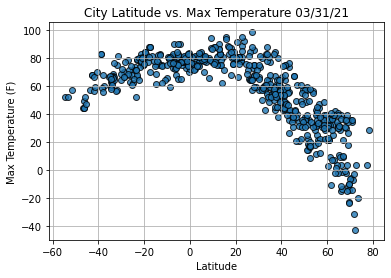

In [17]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show the plot
plt.show()

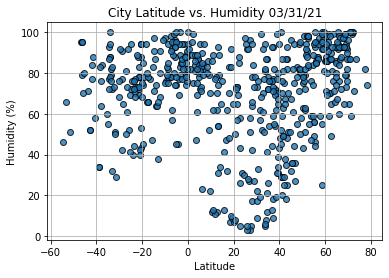

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig2.png")
          
# Show the plot
plt.show()

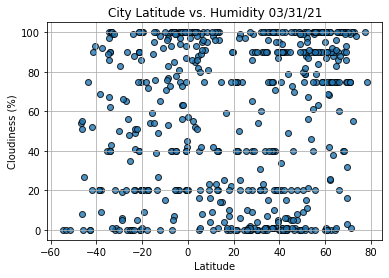

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig3.png")
          
# Show the plot
plt.show()

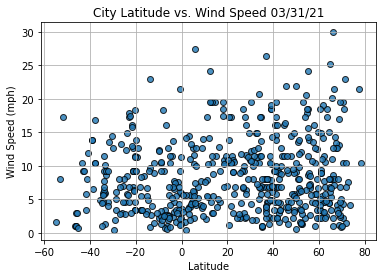

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Import linregress
    
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


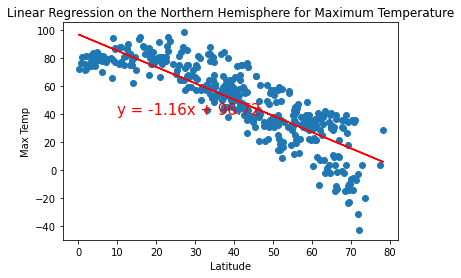

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

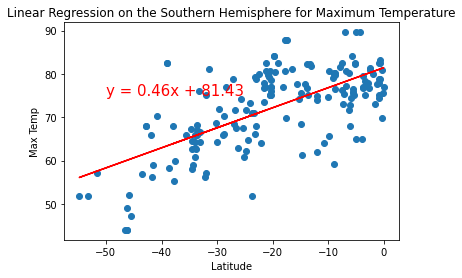

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,75))

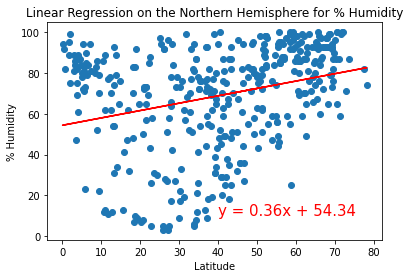

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

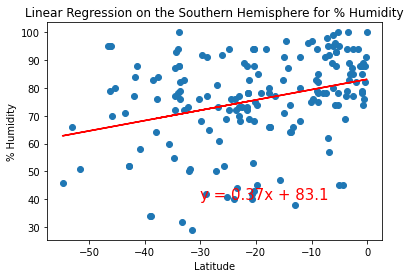

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))

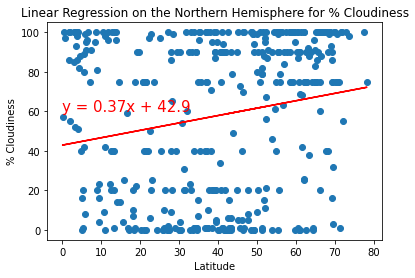

In [72]:
# Linear regression on the Northern Hemisphere Skill Drill
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,60))


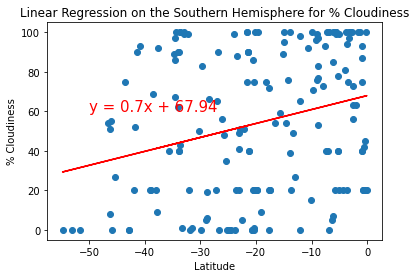

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

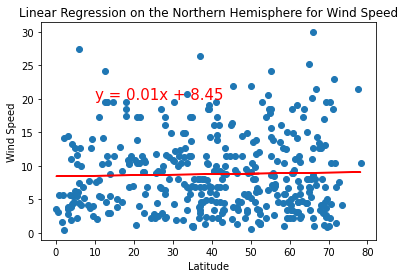

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,20))

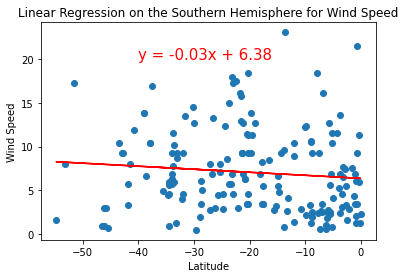

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,20))

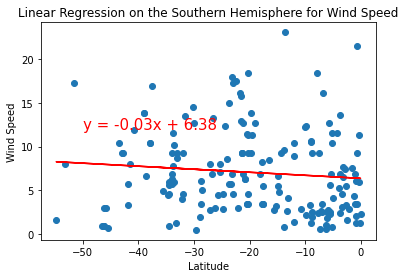

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,12))